In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('Dataset_w6.csv')
df

,country,Region,Surface area (km2),Population in thousands (2017),GDP per capita (current US$),Agricultural production index,International trade: Imports (million US$)
0,Afghanistan,SouthernAsia,652864,35530,623.2,125,3568
1,Albania,SouthernEurope,28748,2930,3984.2,134,4669
2,Algeria,NorthernAfrica,2381741,41318,4154.1,160,47091
3,Angola,MiddleAfrica,1246700,29784,4714.1,175,8790
4,Antigua and Barbuda,Caribbean,442,102,14764.5,88,491
...,...,...,...,...,...,...,...
191,Venezuela (Bolivarian Republic of),SouthAmerica,912050,31977,11068.9,118,16324
192,Viet Nam,South-easternAsia,330967,95541,2067.9,136,174111
193,Yemen,WesternAsia,527968,28250,1106.4,136,6861
194,Zambia,EasternAfrica,752612,17094,1311.1,179,7442


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   country                                     196 non-null    object 
 1   Region                                      196 non-null    object 
 2   Surface area (km2)                          196 non-null    int64  
 3   Population in thousands (2017)              196 non-null    int64  
 4   GDP per capita (current US$)                196 non-null    float64
 5   Agricultural production index               196 non-null    int64  
 6   International trade: Imports (million US$)  196 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 10.8+ KB


##### 1. Find out how many countries are there in the dataset.

In [100]:
df['country'].nunique()

196

In [101]:
df['country'].unique().size

196

##### 2. Examine the data by using visualizations.

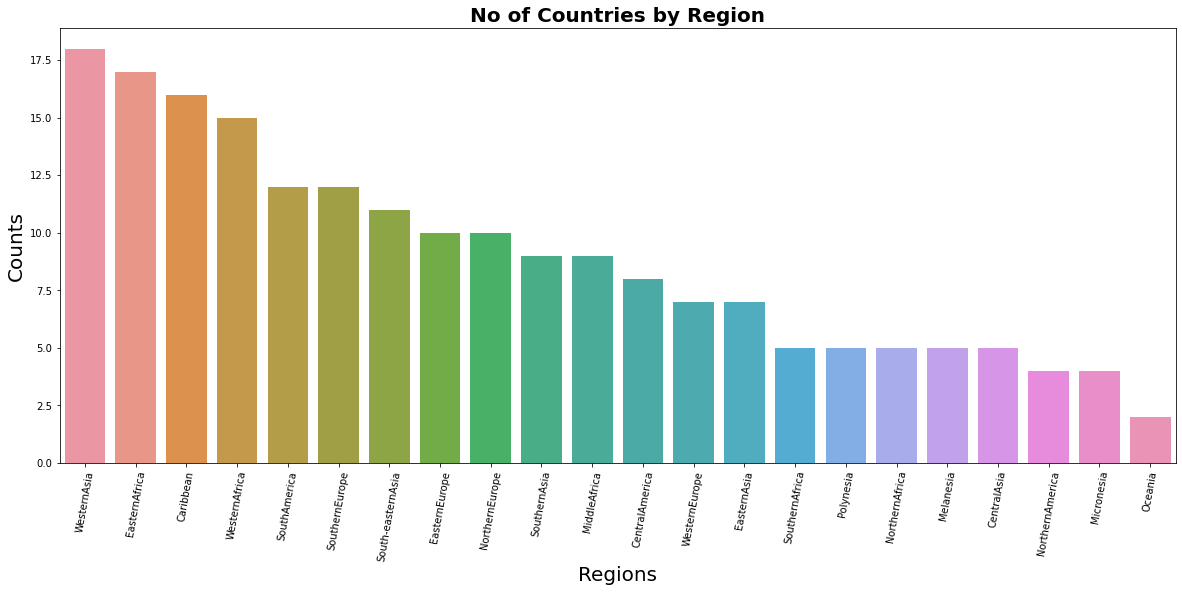

In [102]:
r = df['Region'].value_counts()
plt.figure(figsize=(20,8))
sns.barplot(x=r.index,y=r.values)
plt.title('No of Countries by Region',fontweight='bold',fontsize=20)
plt.xlabel('Regions',fontsize=20)
plt.ylabel('Counts',fontsize=20)
plt.xticks(rotation = 80 )
plt.show()

Text(0.5, 1.0, 'Population Graph of Top 10 regions')

<Figure size 1440x1440 with 0 Axes>

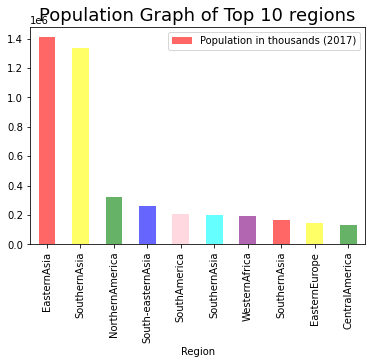

In [113]:
pop=df.nlargest(10,["Population in thousands (2017)"])
plt.figure(figsize=(20,20))
pop.plot(x='Region',y='Population in thousands (2017)',kind='bar',alpha=.6,color=['red','yellow','green','blue','pink','cyan','purple'])
plt.title("Population Graph of Top 10 regions",fontsize=18)


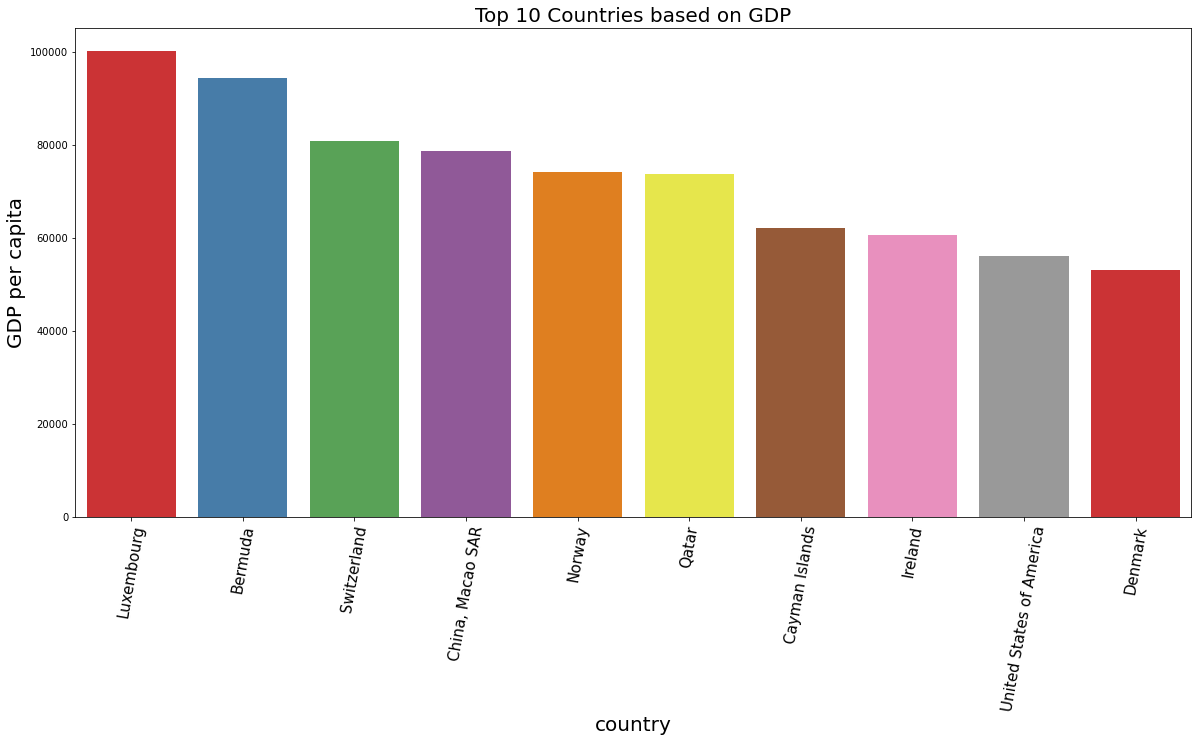

In [104]:
plt.figure(figsize = (20, 9))
sns.barplot(x=df['country'],y=df['GDP per capita (current US$)'],data=df,order=df.sort_values('GDP per capita (current US$)',ascending=False).country.head(10),palette='Set1')
plt.xlabel("country",fontsize=20)
plt.ylabel("GDP per capita",fontsize=20)
plt.title("Top 10 Countries based on GDP",fontsize=20)
plt.xticks(rotation=80,fontsize=15)
plt.show()

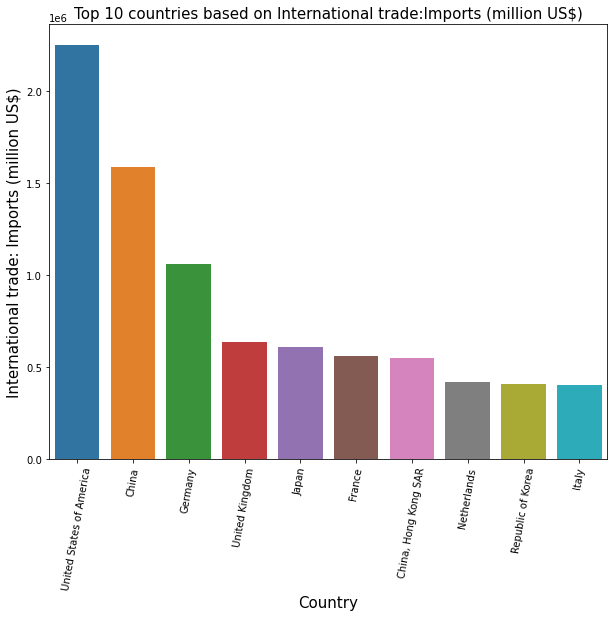

In [105]:
plt.figure(figsize=(10,8))
sns.barplot(x='country',y='International trade: Imports (million US$)',data=df.sort_values('International trade: Imports (million US$)',ascending=False).head(10))
plt.title('Top 10 countries based on International trade:Imports (million US$)',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('International trade: Imports (million US$)',fontsize=15)
plt.xticks(rotation=80)
plt.show()

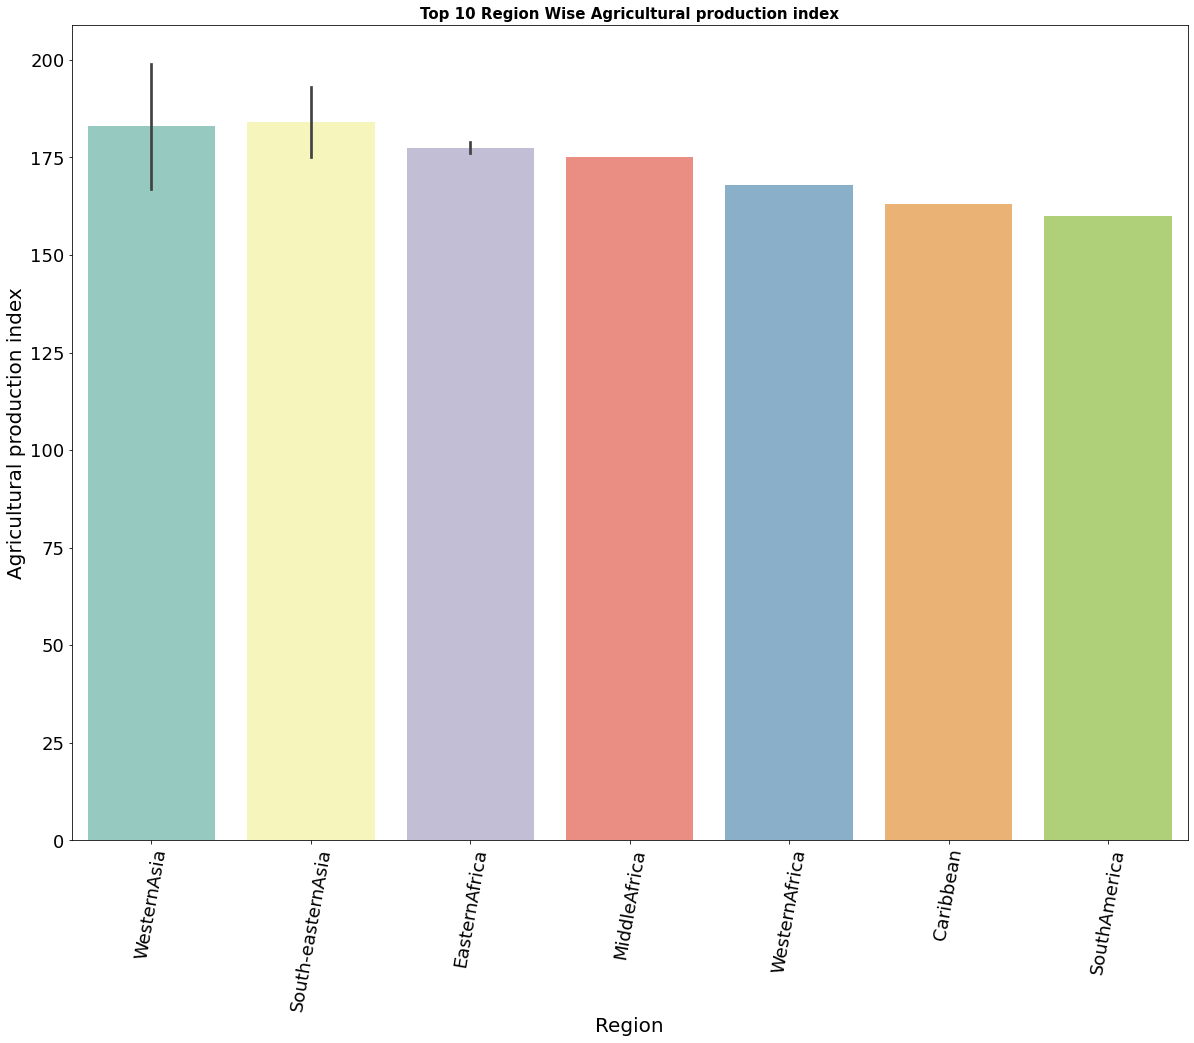

In [106]:
plt.figure(figsize=(20,15))
sns.barplot(x='Region',y='Agricultural production index ',data=df.sort_values('Agricultural production index ',ascending=False).head(10), palette='Set3')
plt.title('Top 10 Region Wise Agricultural production index',fontweight='bold',fontsize=15)
plt.xlabel('Region',fontsize=20)
plt.ylabel('Agricultural production index',fontsize=20)
plt.xticks(rotation=80,fontsize=18)
plt.yticks(fontsize=18)
plt.show()

#### 3. Find out how many countries with respect to the region are available in the dataset

In [107]:
df.groupby("Region")[["country"]].count()

,country
Region,
Caribbean,16
CentralAmerica,8
CentralAsia,5
EasternAfrica,17
EasternAsia,7
EasternEurope,10
Melanesia,5
Micronesia,4
MiddleAfrica,9


##### 4. On average which region has the highest  
a. GDP per capita (current US$) 
 
 b. International trade: Imports (million US$)

In [108]:
#a. On average region wise highest GDP per capita (current US$)
a=df.groupby('Region')[['GDP per capita (current US$)']].mean()
a.nlargest(1,["GDP per capita (current US$)"])

,GDP per capita (current US$)
Region,
NorthernAmerica,57659.0


In [109]:
#b. On average region wise highest 'International trade: Imports (million US$)'
b=df.groupby('Region')[['International trade: Imports (million US$)']].mean()
b.nlargest(1,['International trade: Imports (million US$)'])

,International trade: Imports (million US$)
Region,
NorthernAmerica,663552.25


#### 5. Find out which region has more consistent with respect to GDP per capita (current US$)

In [60]:
#Region have steady  GDP per capita (current US$)
c=df.groupby("Region")[["GDP per capita (current US$)"]].std()
c.nsmallest(1,["GDP per capita (current US$)"])

,GDP per capita (current US$)
Region,
WesternAfrica,815.095399
